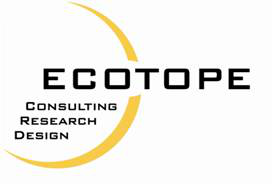

In [5]:
from IPython.display import Image
#Image(filename='ecotope_color_logo.png') 
Image(filename = "ecotope_color_logo.png", width=251.8, height=55.5)

In [6]:
import pandas as pd
import numpy as np

import math
import sqlite3
import os

import matplotlib as plt
import seaborn as sns

## File Path

In [7]:
# define path for database file, you will have to edit to your repository path or it will NOT work
path = "C:\\Users\\scott\\github\\OCCE_HVAC_Comparison\\"
filename = "NEAA_final_dataset.db"

# make connection
con = sqlite3.connect(os.path.join(path, filename))

### Variables defined

In [8]:
# Design Day temperature by city
t_oa_winter = {'Portland':25.0, 'Albany':24.8, 'Eugene':22.8, 'Bend':5.2, 'Salem':23.7,
               'Stayton':23.7, 'Beaverton':25.0, 'Newberg':25.0, 'Medford':22.8, 'Tualatin':25.0,
               'Sherwood':25.0, 'Corvallis':24.8, 'Helix':8.2, 'Crescent':5.2} # outdoor air temperature at Heating Design Setpoint
t_oa_summer = {'Portland':91.2, 'Albany':92.7, 'Eugene':91.8, 'Bend':93.2, 'Salem':92.1,
               'Stayton':92.1, 'Beaverton':91.2, 'Newberg':91.2, 'Medford':99.0, 'Tualatin':91.2,
               'Sherwood':91.2, 'Corvallis':92.7, 'Helix':96.8, 'Crescent':93.2} # outdoor air temperature at Heating Design Setpoint
t_stpt = 72 # room setpoint temperatures

# variables used in CLTD conduction/convection heat gain
cltd_start=40 # starting assumed CLTD for walls and roof
k=1
f=1

# varaibles used for CLF solar heat gain
clf = 0.32 # cooling load factor
shgf = 211 # max solar heat gain factor

# rows to show
row = 15

### Query

In [9]:
# text for UA sql query
sql_query = 'SELECT SITE_DETAILS.siteid, SITE_DETAILS.totalconditionedfloorareaofallbuildings, SITE_DETAILS.totalgrossfloorareaofallbuildings, '
sql_query += 'SITE_DETAILS.[detail.primarybuildingtypecategory], SITE_DETAILS.city, OVERALL_UA.[ua.total], '
sql_query += 'COOLINGLOADENV.WallNorth, COOLINGLOADENV.WallSouth, COOLINGLOADENV.WallEast, COOLINGLOADENV.WallWest, '
sql_query += 'COOLINGLOADENV.WindowWest, COOLINGLOADENV.SC, COOLINGLOADENV.LPD, COOLINGLOADENV.EPD, COOLINGLOADENV.PPL '
sql_query += 'FROM SITE_DETAILS '
sql_query += 'LEFT JOIN OVERALL_UA '
sql_query += 'ON SITE_DETAILS.siteid = OVERALL_UA.siteid '
sql_query += 'LEFT JOIN COOLINGLOADENV '
sql_query += 'ON SITE_DETAILS.siteid = COOLINGLOADENV.siteid'

ENV_GAIN = pd.read_sql_query(sql_query, con)
ENV_GAIN = ENV_GAIN.replace(r'^\s*$', np.nan, regex=True) #replace blank spaces with NaN

ENV_GAIN.head(row)

,siteid,totalconditionedfloorareaofallbuildings,totalgrossfloorareaofallbuildings,detail.primarybuildingtypecategory,city,ua.total,WallNorth,WallSouth,WallEast,WallWest,WindowWest,SC,LPD,EPD,PPL
0,100016,122970.00,167806.0,Multifamily,Portland,8137.350761,12203.50,11841.000,12242.75,12717.25,2712.000000,0.52,3.8,1.1,5.2
1,100201,NaN,87500.0,Office,Tualatin,7583.092000,9573.67,8072.000,3126.00,3126.00,432.000000,0.34,3.8,2.8,6.9
2,101127,49553.00,53434.0,Multifamily,Portland,5160.639796,8211.00,10407.000,6572.00,3164.00,891.000000,0.38,3.8,1.1,5.2
3,101959,140598.00,140598.0,Office,Portland,4275.508684,6912.00,2736.000,7128.00,4392.00,2312.605800,0.46,3.8,2.8,6.9
4,102217,108792.00,108792.0,Retail,Albany,12540.126000,8771.00,8730.000,13914.00,11912.00,777.000000,0.94,5.2,1.8,10.3
5,102938,52641.00,55301.0,School,Eugene,4273.764551,7862.00,7918.000,4874.00,4493.00,256.010806,0.37,4.8,1.8,17.1
6,103148,NaN,71918.0,School,Portland,1614.604000,1579.00,1366.000,880.00,1827.00,673.000000,0.52,4.8,1.8,17.1
7,103453,164179.00,186400.0,Multifamily,Portland,10084.744308,11162.00,11687.000,22813.00,24502.00,7974.000000,0.69,3.8,1.1,5.2
8,104111,28476.00,28476.0,Retail,Bend,2460.480000,1597.00,3123.000,2937.00,3552.00,1805.000000,0.46,5.2,1.8,10.3
9,104148,45791.00,46791.0,School,Portland,2810.260000,2745.00,2381.000,2145.00,2329.00,554.000000,0.52,4.8,1.8,17.1


### Envelope Gain - Conduction and Convection

In [10]:
# CLTD adjustments
# Calculate weighted wall LM
lmN = 3
lmE = 1
lmS = 7
lmW = 1

lm_list = []
cltd_list = []
for i in range(0, len(ENV_GAIN)):
    
    # Calculate LM
    lm = ((ENV_GAIN['WallNorth'][i]*lmN + ENV_GAIN['WallSouth'][i]*lmS + 
                 ENV_GAIN['WallEast'][i]*lmE + ENV_GAIN['WallWest'][i]*lmW) / 
                 (ENV_GAIN['WallNorth'][i] + ENV_GAIN['WallSouth'][i] + 
                  ENV_GAIN['WallEast'][i] + ENV_GAIN['WallWest'][i]))
    lm_list.append(lm)

    # Calculate adjusted CLTD
    cltd = ((cltd_start + lm) * k + (78 - 72) + (t_oa_summer[ENV_GAIN['city'][i]] - 85)) * f
    cltd_list.append(cltd)
    
# append lists to df
ENV_GAIN['LM'] = lm_list
ENV_GAIN['CLTD'] = cltd_list

# calculate heat gain from conduction
ENV_GAIN['Heat Gain UA [kBtu]'] = (ENV_GAIN['CLTD'] * ENV_GAIN['ua.total']) / 1000

In [11]:
ENV_GAIN.head(row)

,siteid,totalconditionedfloorareaofallbuildings,totalgrossfloorareaofallbuildings,detail.primarybuildingtypecategory,city,ua.total,WallNorth,WallSouth,WallEast,WallWest,WindowWest,SC,LPD,EPD,PPL,LM,CLTD,Heat Gain UA [kBtu]
0,100016,122970.00,167806.0,Multifamily,Portland,8137.350761,12203.50,11841.000,12242.75,12717.25,2712.000000,0.52,3.8,1.1,5.2,2.947842,55.147842,448.757330
1,100201,NaN,87500.0,Office,Tualatin,7583.092000,9573.67,8072.000,3126.00,3126.00,432.000000,0.34,3.8,2.8,6.9,3.827863,56.027863,424.864441
2,101127,49553.00,53434.0,Multifamily,Portland,5160.639796,8211.00,10407.000,6572.00,3164.00,891.000000,0.38,3.8,1.1,5.2,3.781407,55.981407,288.899874
3,101959,140598.00,140598.0,Office,Portland,4275.508684,6912.00,2736.000,7128.00,4392.00,2312.605800,0.46,3.8,2.8,6.9,2.428571,54.628571,233.564932
4,102217,108792.00,108792.0,Retail,Albany,12540.126000,8771.00,8730.000,13914.00,11912.00,777.000000,0.94,5.2,1.8,10.3,2.613820,56.313820,706.182404
5,102938,52641.00,55301.0,School,Eugene,4273.764551,7862.00,7918.000,4874.00,4493.00,256.010806,0.37,4.8,1.8,17.1,3.514495,56.314495,240.674891
6,103148,NaN,71918.0,School,Portland,1614.604000,1579.00,1366.000,880.00,1827.00,673.000000,0.52,4.8,1.8,17.1,3.008846,55.208846,89.140424
7,103453,164179.00,186400.0,Multifamily,Portland,10084.744308,11162.00,11687.000,22813.00,24502.00,7974.000000,0.69,3.8,1.1,5.2,2.317570,54.517570,549.795756
8,104111,28476.00,28476.0,Retail,Bend,2460.480000,1597.00,3123.000,2937.00,3552.00,1805.000000,0.46,5.2,1.8,10.3,2.956642,57.156642,140.632774
9,104148,45791.00,46791.0,School,Portland,2810.260000,2745.00,2381.000,2145.00,2329.00,554.000000,0.52,4.8,1.8,17.1,3.060000,55.260000,155.294968


### Envelope Gain - Fenestration

In [12]:
solarGain_list = []
for i in range(0, len(ENV_GAIN)):
    solarGain = (ENV_GAIN['WindowWest'][i]*ENV_GAIN['SC'][i]*shgf*clf) / 1000
    solarGain_list.append(solarGain)
    
ENV_GAIN['Heat Gain Solar [kBtu]'] = solarGain_list

### Internal Loads

In [13]:
internalGains = []
for i in range(0, len(ENV_GAIN)):
    
    # determine area to use
    if math.isnan(ENV_GAIN['totalconditionedfloorareaofallbuildings'][i]):
        if math.isnan(ENV_GAIN['totalgrossfloorareaofallbuildings'][i]):
            area = 0
        else:
            area = ENV_GAIN['totalgrossfloorareaofallbuildings'][i]
    else:
        area = ENV_GAIN['totalconditionedfloorareaofallbuildings'][i]
    
    # check internal load assumptions ** dividing by 10 to make reasonable. 
    internalGains.append((area * (ENV_GAIN['LPD'][i] + ENV_GAIN['EPD'][i] + ENV_GAIN['PPL'][i])) / 10000)

ENV_GAIN['Heat Gain Internal [kBtu]'] = internalGains

In [14]:
ENV_GAIN.head(row)

,siteid,totalconditionedfloorareaofallbuildings,totalgrossfloorareaofallbuildings,detail.primarybuildingtypecategory,city,ua.total,WallNorth,WallSouth,WallEast,WallWest,WindowWest,SC,LPD,EPD,PPL,LM,CLTD,Heat Gain UA [kBtu],Heat Gain Solar [kBtu],Heat Gain Internal [kBtu]
0,100016,122970.00,167806.0,Multifamily,Portland,8137.350761,12203.50,11841.000,12242.75,12717.25,2712.000000,0.52,3.8,1.1,5.2,2.947842,55.147842,448.757330,95.219405,124.199700
1,100201,NaN,87500.0,Office,Tualatin,7583.092000,9573.67,8072.000,3126.00,3126.00,432.000000,0.34,3.8,2.8,6.9,3.827863,56.027863,424.864441,9.917338,118.125000
2,101127,49553.00,53434.0,Multifamily,Portland,5160.639796,8211.00,10407.000,6572.00,3164.00,891.000000,0.38,3.8,1.1,5.2,3.781407,55.981407,288.899874,22.860922,50.048530
3,101959,140598.00,140598.0,Office,Portland,4275.508684,6912.00,2736.000,7128.00,4392.00,2312.605800,0.46,3.8,2.8,6.9,2.428571,54.628571,233.564932,71.827686,189.807300
4,102217,108792.00,108792.0,Retail,Albany,12540.126000,8771.00,8730.000,13914.00,11912.00,777.000000,0.94,5.2,1.8,10.3,2.613820,56.313820,706.182404,49.315258,188.210160
5,102938,52641.00,55301.0,School,Eugene,4273.764551,7862.00,7918.000,4874.00,4493.00,256.010806,0.37,4.8,1.8,17.1,3.514495,56.314495,240.674891,6.395764,124.759170
6,103148,NaN,71918.0,School,Portland,1614.604000,1579.00,1366.000,880.00,1827.00,673.000000,0.52,4.8,1.8,17.1,3.008846,55.208846,89.140424,23.629299,170.445660
7,103453,164179.00,186400.0,Multifamily,Portland,10084.744308,11162.00,11687.000,22813.00,24502.00,7974.000000,0.69,3.8,1.1,5.2,2.317570,54.517570,549.795756,371.499091,165.820790
8,104111,28476.00,28476.0,Retail,Bend,2460.480000,1597.00,3123.000,2937.00,3552.00,1805.000000,0.46,5.2,1.8,10.3,2.956642,57.156642,140.632774,56.061856,49.263480
9,104148,45791.00,46791.0,School,Portland,2810.260000,2745.00,2381.000,2145.00,2329.00,554.000000,0.52,4.8,1.8,17.1,3.060000,55.260000,155.294968,19.451162,108.524670


### Summation

In [15]:
ENV_GAIN['Cooling Load - Envelop and Internal [kBtu]'] = ENV_GAIN['Heat Gain Solar [kBtu]'] + ENV_GAIN['Heat Gain UA [kBtu]'] + ENV_GAIN['Heat Gain Internal [kBtu]']
ENV_GAIN.head(row)

,siteid,totalconditionedfloorareaofallbuildings,totalgrossfloorareaofallbuildings,detail.primarybuildingtypecategory,city,ua.total,WallNorth,WallSouth,WallEast,WallWest,...,SC,LPD,EPD,PPL,LM,CLTD,Heat Gain UA [kBtu],Heat Gain Solar [kBtu],Heat Gain Internal [kBtu],Cooling Load - Envelop and Internal [kBtu]
0,100016,122970.00,167806.0,Multifamily,Portland,8137.350761,12203.50,11841.000,12242.75,12717.25,...,0.52,3.8,1.1,5.2,2.947842,55.147842,448.757330,95.219405,124.199700,668.176435
1,100201,NaN,87500.0,Office,Tualatin,7583.092000,9573.67,8072.000,3126.00,3126.00,...,0.34,3.8,2.8,6.9,3.827863,56.027863,424.864441,9.917338,118.125000,552.906778
2,101127,49553.00,53434.0,Multifamily,Portland,5160.639796,8211.00,10407.000,6572.00,3164.00,...,0.38,3.8,1.1,5.2,3.781407,55.981407,288.899874,22.860922,50.048530,361.809326
3,101959,140598.00,140598.0,Office,Portland,4275.508684,6912.00,2736.000,7128.00,4392.00,...,0.46,3.8,2.8,6.9,2.428571,54.628571,233.564932,71.827686,189.807300,495.199918
4,102217,108792.00,108792.0,Retail,Albany,12540.126000,8771.00,8730.000,13914.00,11912.00,...,0.94,5.2,1.8,10.3,2.613820,56.313820,706.182404,49.315258,188.210160,943.707822
5,102938,52641.00,55301.0,School,Eugene,4273.764551,7862.00,7918.000,4874.00,4493.00,...,0.37,4.8,1.8,17.1,3.514495,56.314495,240.674891,6.395764,124.759170,371.829826
6,103148,NaN,71918.0,School,Portland,1614.604000,1579.00,1366.000,880.00,1827.00,...,0.52,4.8,1.8,17.1,3.008846,55.208846,89.140424,23.629299,170.445660,283.215383
7,103453,164179.00,186400.0,Multifamily,Portland,10084.744308,11162.00,11687.000,22813.00,24502.00,...,0.69,3.8,1.1,5.2,2.317570,54.517570,549.795756,371.499091,165.820790,1087.115638
8,104111,28476.00,28476.0,Retail,Bend,2460.480000,1597.00,3123.000,2937.00,3552.00,...,0.46,5.2,1.8,10.3,2.956642,57.156642,140.632774,56.061856,49.263480,245.958110
9,104148,45791.00,46791.0,School,Portland,2810.260000,2745.00,2381.000,2145.00,2329.00,...,0.52,4.8,1.8,17.1,3.060000,55.260000,155.294968,19.451162,108.524670,283.270799


In [16]:
folder = 'RESULTS\\'
name = 'ENV_GAIN.csv'
ENV_GAIN.to_csv(path + folder + name)

PermissionError: [Errno 13] Permission denied: 'C:\\Users\\scott\\github\\OCCE_HVAC_Comparison\\RESULTS\\ENV_GAIN.csv'

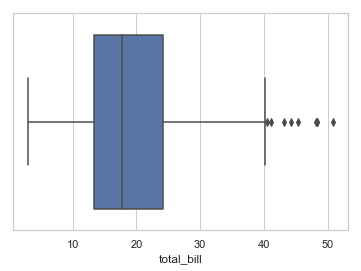

In [3]:
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.boxplot(x=tips["total_bill"])

In [17]:
tips["total_bill"]

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
5      25.29
6       8.77
7      26.88
8      15.04
9      14.78
10     10.27
11     35.26
12     15.42
13     18.43
14     14.83
15     21.58
16     10.33
17     16.29
18     16.97
19     20.65
20     17.92
21     20.29
22     15.77
23     39.42
24     19.82
25     17.81
26     13.37
27     12.69
28     21.70
29     19.65
       ...  
214    28.17
215    12.90
216    28.15
217    11.59
218     7.74
219    30.14
220    12.16
221    13.42
222     8.58
223    15.98
224    13.42
225    16.27
226    10.09
227    20.45
228    13.28
229    22.12
230    24.01
231    15.69
232    11.61
233    10.77
234    15.53
235    10.07
236    12.60
237    32.83
238    35.83
239    29.03
240    27.18
241    22.67
242    17.82
243    18.78
Name: total_bill, Length: 244, dtype: float64